# Table of Contents
## 01. Importing Libraries
## 02. Creating Charts
## 03. Task 4.9 exercise
## 04. Exporting visualizations

## 01. Importing Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing dataset
# Import data
path = r'/Users/lianabulte/Career Foundry/2023 02 Instacart Basket Analysis'
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all2.pkl'))

In [4]:
# checking dataset
df_ords_prods_all.shape

(30328764, 33)

* please note data for the high price of the milk products have been already replaced with NaN from the 4.9 reading material

## 02. Creating Charts

Bar Charts

<AxesSubplot:>

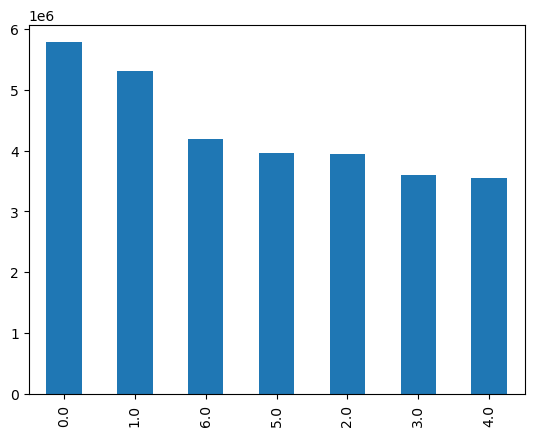

In [5]:
# creating a bar chart of orders day of the week
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

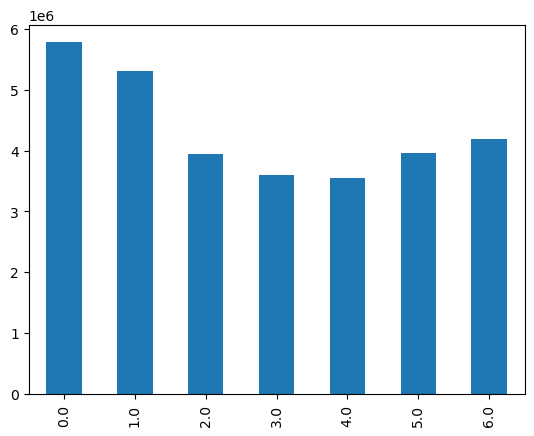

In [6]:
# changing the order to follow the order of the days of the week
bar = df_ords_prods_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

Histograms

<AxesSubplot:ylabel='Frequency'>

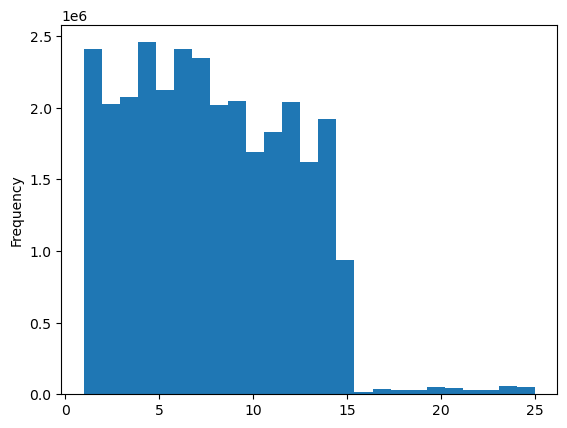

In [9]:
# creating a histogram
df_ords_prods_all['prices'].plot.hist(bins = 25)

Scatterplot

<AxesSubplot:xlabel='prices', ylabel='prices'>

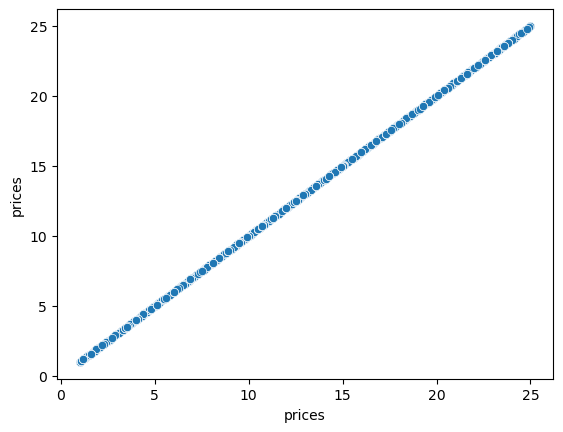

In [10]:
# creating scatterplot of prices to identify outliers
sns.scatterplot(x = 'prices', y = 'prices', data = df_ords_prods_all)

Additional Histogram

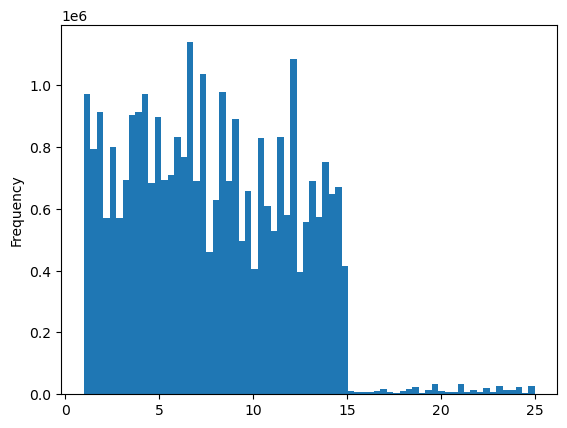

In [11]:
# creating histogram with 70 bins
hist2 = df_ords_prods_all['prices'].plot.hist(bins = 70)

Samples subset for line chart

In [12]:
# Creating a list holding true/false values to the test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [13]:
dev

array([False,  True, False, ..., False,  True,  True])

In [14]:
# store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [15]:
# store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [17]:
len(df_ords_prods_all)

30328764

In [18]:
# veryfing that the parts equal the total rows of df_ords_prods_all
len(big) + len(small)

30328764

In [19]:
# creating a new dataframe from the small subset
df_2 = small[['orders_day_of_week', 'prices']]

Line Chart

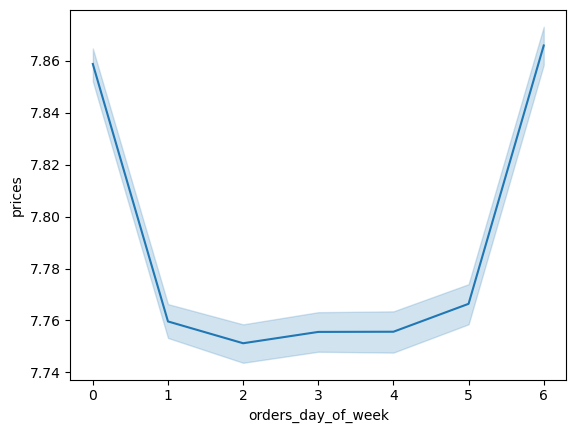

In [20]:
# creating line chart with df_2
line = sns.lineplot(data = df_2, x = 'orders_day_of_week', y = 'prices')

## 03. Task 4.9 exercise

In [26]:
df_ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'avg_price', 'spending_flag', 'median_prior_order',
       'order_frequency_flag', 'first_name', 'last_name', 'gender', 'state',
       'age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')

### 3.Create Histogram of the "order hour of day" column

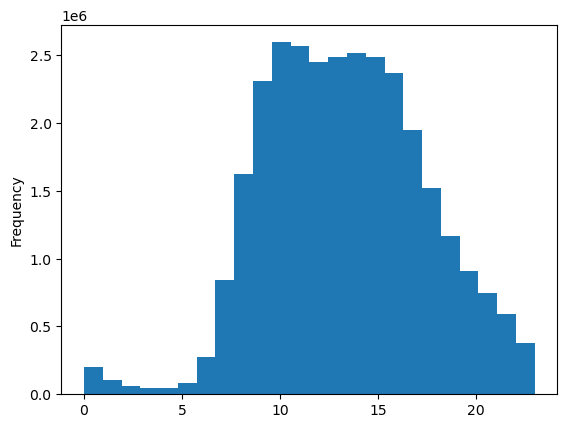

In [22]:
# creating histogram 
hist_order_hour_of_day = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

* This histogram demonstrates the frequency of orders placed over the 24 hours in a day 

### 4.Create bar chart from the "loyalty flag" column

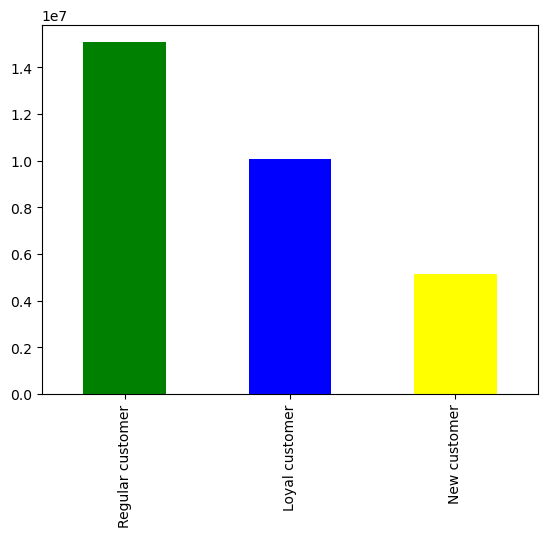

In [25]:
# creating bar chart
bar_loyalty_flag = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar(color =['green', 'blue', 'yellow'])

### 5. Check whether there's a difference in expenditure depending on the hour of the day (must use accurate sample for line chart)

In [27]:
# creating a new dataframe from the small subset
df_order_hour_price = small[['order_hour_of_day', 'prices']]

In [28]:
# verify df
df_order_hour_price.head()

,order_hour_of_day,prices
0,7.0,9.0
2,7.0,9.0
3,15.0,9.0
6,14.0,9.0
10,12.0,3.0


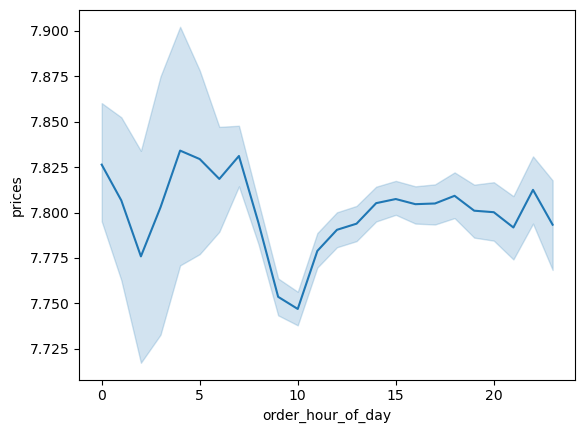

In [37]:
# creating line chart with df_order_hour_price
line_order_hour_price = sns.lineplot(data = df_order_hour_price, x = 'order_hour_of_day', y = 'prices')

### 6. Determine whether there's a connection between age and family situation by creating a line chart exploring the connection between age and number of dependents (describe what the line chart shows)

In [31]:
# creating a new dataframe from the small subset
df_age_dependants = small[['age', 'n_dependants']]

In [32]:
# verify df
df_age_dependants.head()

,age,n_dependants
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3


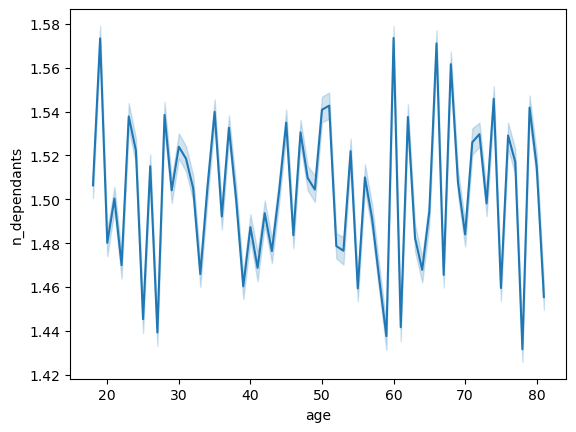

In [38]:
# creating line chart with df_age_dependants
line_age_dependants = sns.lineplot(data = df_age_dependants, x = 'age', y = 'n_dependants')

* there is no pattern to idenitfy a strong correlation between age and number of dependants, therefore this is no correlation

### 7. Explore whether there's a connection between age and spending power (income). Create a scatterplott using the sns.scatterplot function

In [34]:
# creating a new dataframe from the small subset
df_age_income = small[['age','income']]

In [35]:
# verify df
df_age_income.head()

,age,income
0,31,40423
2,31,40423
3,31,40423
6,31,40423
10,31,40423


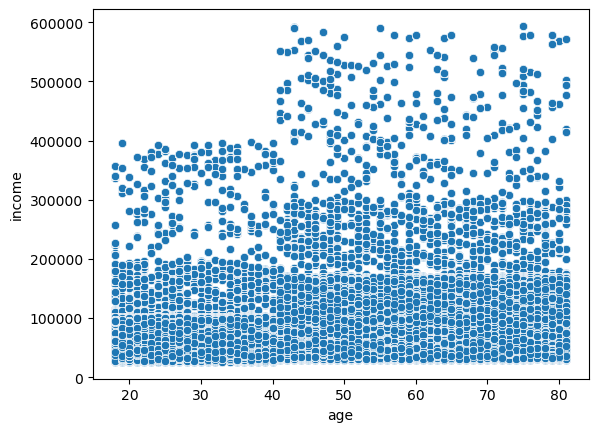

In [39]:
# creating scatterplot 
scatterplot_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_age_income)

* The scatterplot shows that there is a positive correlation as age increases, so does income. This is shown at the age of 40 where the income points rise above the 400000 mark 

## 04. Exporting visualizations as .png files

In [40]:
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

In [41]:
hist2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_freq_prices.png'))

In [42]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_orders_dow.png'))

In [43]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_hour_of_day.png'))

In [45]:
bar_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty_freq_order.png'))

In [46]:
line_order_hour_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_price.png'))

In [47]:
line_age_dependants.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [48]:
scatterplot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_age_income.png'))